In [13]:
import sympy as sym
import sympy.physics.mechanics as me
from sympy.abc import t

import numpy as np

import moyra as ma

import sys, os
me.mechanics_printing()

In [14]:
DoFs = 6

# heave and fold angle as degrres of freedom
p = ma.DynamicModelParameters(DoFs)

## pendulum mass
p.m_1 = ma.ModelSymbol(value = 0.3,string = 'm_1')
p.m_2 = ma.ModelSymbol(value = 0.3,string = 'm_2')

## pendulum moment of inertia
p.I_1 = ma.ModelSymbol(value = 0.3,string = 'I_1')
p.I_2 = ma.ModelSymbol(value = 0.3,string = 'I_2')

# pendulum length
p.L_1 = ma.ModelSymbol(value = 0.3,string = 'L_1')
p.L_2 = ma.ModelSymbol(value = 0.3,string = 'L_2')

#gravity vector
p.g  = ma.ModelSymbol(value = 9.81,string = 'g')                     # gravity
p.g_v = ma.ModelMatrix(value =[0,0,-1],length=3,string='g_v') # The stationary point

## Numeric Model Constants
p.fp = ma.ModelMatrix(value =[0]*p.qs*2,length=p.qs*2,string='fp') # The stationary point

In [15]:
#define refernce frames
body_1 = ma.frames.HomogenousFrame().Translate(0,p.q[0],p.q[1]).R_x(p.q[2])
body_2 = ma.frames.HomogenousFrame().Translate(0,p.q[3],p.q[4]).R_x(p.q[5])

In [16]:
#Create Elemnts
link_1 = ma.elements.RigidElement(p.q,body_1,ma.elements.MassMatrix(p.m_1,I_xx=p.I_1), grav_vec=p.g*p.g_v)
link_2 = ma.elements.RigidElement(p.q,body_2,ma.elements.MassMatrix(p.m_2,I_xx=p.I_2), grav_vec=p.g*p.g_v)

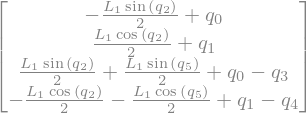

In [17]:
C = []
tmp = body_1.transform_point([0,0,p.L_1/2])
C.append(tmp[1])
C.append(tmp[2])
tmp = body_1.transform_point([0,0,-p.L_1/2])-body_2.transform_point([0,0,p.L_1/2])
C.append(tmp[1])
C.append(tmp[2])
C = sym.Matrix(C)
C

In [18]:
# Create the SYmbolic Model
sm = ma.SymbolicModel.FromElementsAndForces(p.q,[link_1,link_2],C=C).subs({p.g_v[0]:0,p.g_v[1]:0,p.g_v[2]:-1})

Generating EoM for Element default:RigidElement
Generating EoM for Element default:RigidElement


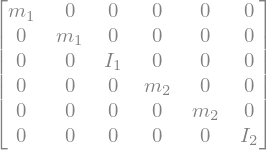

In [10]:
sm.M

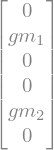

In [11]:
sym.simplify(sm.f)

In [12]:
base_dir = "C:\\Git\\NastranMBD\\"
class_name = "pendulum_MBD"
base_class = "BaseMBD"
sm.to_matlab_class(p,base_dir,class_name,base_class)